# Task 2 

In [56]:
# Data
A1 = 16
A2 = 8
B1 = 10
B2 = 8
C1 = 14
C2 = 6
p1 = 10
p2 = 12
cO = 100
x1 = 2.042
x2 = 3.267
x3 = 2.333
x4 = 2.4
x5 = 2.4
x6 = 3.2
x7 = 0.358
x8 = 0

In [2]:
low = lambda mu: mu * .8
high = lambda mu: mu* 1.1
LA1, LA2, LB1, LB2, LC1, LC2 = low(A1), low(A2), low(B1), low(B2), low(C1), low(C2)
HA1, HA2, HB1, HB2, HC1, HC2 = high(A1), high(A2), high(B1), high(B2), high(C1), high(C2)

Let $M$ be the stochastic variable denoting the production rates and $m$ be the representation of the possible production rates $M$ can take. Let $u$ be the number of units produced, $T$ the stochastic variable denoting the time it takes to produce $u$ units and $t$ be the representation of the possible times it takes to produce $u$ units.

We can simplify by setting $u=1$, we then get $$ t_1 = \frac{1}{\mu}$$ and $$T_1 = \frac{1}{M_1}$$
Then, we effectively get the time per unit.

We can therefore simply calculate $M_1$, which is PERT distriuted and take the inverse to get the time. 

The expectation and variance of a PERT-distrbuted stochastic variable is given by equation (3.53) in the compendium. 

#### a) Expectation and variance 

In [3]:
def PERTe(L, M, H):
    return (L + 4*M + H)/6
def PERTvar(L, M, H):
    E = PERTe(L, M, H)
    return (E - L)*(H - E)/7 

In [4]:
inv = lambda mu: 1/mu # inverse function. Go from mu to t

In [5]:
# calculate m's
mA1, varmA1 = PERTe(LA1, A1, HA1), PERTvar(LA1, A1, HA1)
mB1, varmB1 = PERTe(LB1, B1, HB1), PERTvar(LB1, B1, HB1)
mC1, varmC1 = PERTe(LC1, C1, HC1), PERTvar(LC1, C1, HC1)
mA2, varmA2 = PERTe(LA2, A2, HA2), PERTvar(LA2, A2, HA2)
mB2, varmB2 = PERTe(LB2, B2, HB2), PERTvar(LB2, B2, HB2)
mC2, varmC2 = PERTe(LC2, C2, HC2), PERTvar(LC2, C2, HC2)

In [6]:
# calculate t's
# inverse of lows
tLA1, tLA2, tLB1, tLB2, tLC1, tLC2 = (inv(x) for x in [LA1, LA2, LB1, LB2, LC1, LC2])
# inverse of mediums
tMA1, tMA2, tMB1, tMB2, tMC1, tMC2 = (inv(x) for x in [A1, A2, B1, B2, C1, C2])
#inverse of highs
tHA1, tHA2, tHB1, tHB2, tHC1, tHC2 = (inv(x) for x in [HA1, HA2, HB1, HB2, HC1, HC2])

In [7]:
# calculate T1
tA1, vartA1 = PERTe(tLA1, tMA1, tHA1), PERTvar(tLA1, tMA1, tHA1)
tB1, vartB1 = PERTe(tLB1, tMB1, tHB1), PERTvar(tLB1, tMB1, tHB1)
tC1, vartC1 = PERTe(tLC1, tMC1, tHC1), PERTvar(tLC1, tMC1, tHC1)
tA2, vartA2 = PERTe(tLA2, tMA2, tHA2), PERTvar(tLA2, tMA2, tHA2)
tB2, vartB2 = PERTe(tLB2, tMB2, tHB2), PERTvar(tLB2, tMB2, tHB2)
tC2, vartC2 = PERTe(tLC2, tMC2, tHC2), PERTvar(tLC2, tMC2, tHC2)

In [8]:
import pandas as pd

In [9]:
dic = {'Machine/product': ['A1', 'B1', 'C1', 'A2', 'B2', 'C2'],
       'Expected time': [tA1, tB1, tC1, tA2, tB2, tC2],
       'Variance in time': [vartA1, vartB1, vartC1, vartA2, vartB2, vartC2]
      }
# columns = ['Machine/product', 'Expected time', 'Variance time']
df = pd.DataFrame(dic)
df.reset_index(drop=True)
display(df)

,Machine/product,Expected time,Variance in time
0,A1,0.064157,0.000015
1,B1,0.102652,0.000037
2,C1,0.073323,0.000019
3,A2,0.128314,0.000059
4,B2,0.128314,0.000059
5,C2,0.171086,0.000104


In [10]:
print(sum(df['Expected time']))

NameError: name 'A1_forventning' is not defined

In [11]:
e1, v1 = PERTe(0.8, 1, 1.1), PERTvar(0.8, 1, 1.1)
print(e1)
print(v1)
print(1/e1)


0.9833333333333334
0.0030555555555555566
1.0169491525423728


#### c) 

#### d) 

In [12]:
units1 = x1 * A1
units2 = x4 * A2
print(f"Units to produce of product 1: {units1}")
print(f"Units to produce of product 2: {units2}")

Units to produce of product 1: 32.672
Units to produce of product 2: 19.2


#### a) 

In [13]:
from pert import PERT
import scipy
from scipy.integrate import quad
import math
import numpy as np
from IPython.display import Image

In [14]:
def exp_var_PERT(mu, u):
    L = 0.8*mu
    M = mu
    H = 1.1*mu
    pert = PERT(L, M, H)
    fX = lambda x: pert.pdf(x)
    g = lambda x: u/x
    fun_exp = lambda x: g(x)*fX(x)
    exp, err = quad(fun_exp, L, H)
    fun_var = lambda x: (g(x)-exp)**2*fX(x)
    var, err_var = quad(fun_var, L, H)
    return exp, var

Testing with u = 1 and mu = 1 yields:

In [15]:
exp, var = exp_var_PERT(1, 1)
print(f"E(g(X)) = {exp:.5f}")
print(f"Var(g(X)) = {var:.5f}")

E(g(X)) = 1.02024
Var(g(X)) = 0.00345


#### b) 

In [16]:
def exp_var_PERT_MCS(mu, u, num):
    L = 0.8 * mu
    H = 1.1*mu
    M = mu
    alpha = 1 + 4*(M - L)/(H-L)
    beta = 1 + 4*(H - M)/(H-L)
    values = u/(L + np.random.beta(alpha, beta, size=10000)*(H-L))
    exp = np.average(values)
    var = np.var(values)
    return exp, var

Testing with u = 1 and mu = 1 yields and 10000 simulations yields:

In [17]:
exp, var = exp_var_PERT_MCS(1, 1, 10000)
print(f"E(g(X)) = {exp:.5f}")
print(f"Var(g(X)) = {var:.5f}")

E(g(X)) = 1.02052
Var(g(X)) = 0.00347


#### c)

![title](TPK5115_semester_task2c.png)

#### d) 

We simply utilize the method described in chapter 4.3, with out network described by out above picture. In the below code, we let TA1 denote the time it takes (expected and variance) to produce u units for product 1 on machine A. Further let TA1F denote the time it takes (expected and variance) to finalize activity A1, given the above paths.

First, we calculate the number of units to produce according to the operations research department.

In [18]:
units1 = x1 * A1
units2 = x4 * A2
print(f"Units to produce of product 1: {units1}")
print(f"Units to produce of product 2: {units2}")

Units to produce of product 1: 32.672
Units to produce of product 2: 19.2


Now, we calculate the expected time for each acitivity.

In [19]:
mus1 = [A1, B1, C1]
mus2 = [A2, B2, C2]
times1 = [(exp_var_PERT(mu, units1)) for mu in mus1]
times2 = [(exp_var_PERT(mu, units2)) for mu in mus2]

Then, we print out the values and apply them to the excel-sheet to account for the virtual nodes by using VarMax and EMax.

In [20]:
LETTERS = ["A", "B", "C"]
for index, val in enumerate(times1):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}1:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')
    
for index, val in enumerate(times2):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}2:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')    
    

TA1:
E = 2.08334
Var = 0.01439
----------------
TB1:
E = 3.33334
Var = 0.03683
----------------
TC1:
E = 2.38096
Var = 0.01879
----------------
TA2:
E = 2.44858
Var = 0.01987
----------------
TB2:
E = 2.44858
Var = 0.01987
----------------
TC2:
E = 3.26478
Var = 0.03533
----------------


Now we can insert the values in Excel to get the following result:

![title](TPK5115_semester_task2d.png)

#### e) 

We repeat the same procedure, but this time we use Monte Carlo Simluation to calculate the expected time (that is, we use the exp_var_PERT_MCS function). We choose to run 10000 simulations. Note that if the calculated values deviate from the excel-spreadsheet in this task, it is because the notebook has been rerun (consequently the values may differ since it is a simulation).

In [21]:
num_sim = 10e3
times1 = [(exp_var_PERT_MCS(mu, units1, num_sim)) for mu in mus1]
times2 = [(exp_var_PERT_MCS(mu, units2, num_sim)) for mu in mus2]

In [22]:
for index, val in enumerate(times1):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}1:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')
    
for index, val in enumerate(times2):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}2:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')    

TA1:
E = 2.08265
Var = 0.01440
----------------
TB1:
E = 3.33494
Var = 0.03635
----------------
TC1:
E = 2.37931
Var = 0.01899
----------------
TA2:
E = 2.44923
Var = 0.01927
----------------
TB2:
E = 2.44769
Var = 0.01986
----------------
TC2:
E = 3.26545
Var = 0.03505
----------------


The first time the above code was run, the following result was printed (it was saved as a picture):

![title](TPK5115_semester_task2e1.png)

In excel, we get the following result for the MCS:

![title](TPK5115_semester_task2e2.png)

In [23]:
time_SSP = 8.36456
time_MCS = 8.36693
hours_day = 8
overtime_SSP, overtime_MCS = time_SSP - hours_day, time_MCS - hours_day
cost_overtime_SSP = overtime_SSP*cO
cost_overtime_MCS = overtime_MCS*cO
print(f"Overtime SSP = {overtime_SSP:.3f} hours")
print(f"Cost of overtime SSP = {cost_overtime_SSP:.3f}")
print('----------')
print(f"Overtime MCS = {overtime_MCS:.3f} hours")
print(f"Cost of overtime MCS = {cost_overtime_MCS:.3f}")

Overtime SSP = 0.365 hours
Cost of overtime SSP = 36.456
----------
Overtime MCS = 0.367 hours
Cost of overtime MCS = 36.693


To calculate this efficiently, we apply the VarMax and EMax function in python and solve numerically. We assume that the reduction in production p is percentvise similar for P1 and P2, that is, we reduce the production of both products to new_number_units = old_number_units*(1-p)

We let Y = max(X1, X2), and use a monte carlo simulation procedure to find the expected value and variance. As is done in the 'pRisk' excel-sheet, we assume that the input distributions are independent and normally distributed. We control our procedure of finding eMax and VarMax with the excel-function, and see (although not shown), that the provided result is close to equal. They deviate since they are both numerical.

In [24]:
from numpy.random import normal

In [31]:
def eMax_VarMax(mu1, var1, mu2, var2, num_sim = 1000):
    sigma1, sigma2 = math.sqrt(var1), math.sqrt(var2)
    X1 = normal(loc = mu1, scale = sigma1, size = num_sim)
    X2 = normal(loc = mu2, scale = sigma2, size = num_sim)
    Y = np.array([max(X1[i], X2[i]) for i in range(len(X1))])
    exp, var = np.average(Y), np.var(Y)
    return exp, var
    
    
exp, var = eMax_VarMax_PERT(10, 2, 8, 1)
print(exp, var)

10.092620833461558 1.656103854572763


In [63]:
ps = np.arange(0, 0.2, 0.01)
n = len(ps)
production_times = np.zeros(n)
overtimes = np.zeros(n)
cost_of_overtimes = np.zeros(n)
revenues = np.zeros(n)
profits = np.zeros(n)
num_units1 = np.zeros(n)
num_units2 = np.zeros(n)
max_profit, index = (0, 0)
for i, p in enumerate(ps):
    # Calculate units produced
    num_u1 = units1*(1-p)
    num_u2 = units2*(1-p)
    num_units1[i] = num_u1
    num_units2[i] = num_u2
    # Calculate revenue
    revenue = num_u1*p1 + num_u2*p2
    revenues[i] = revenue
    # Calculate time to produce units for product 1
    TA1, VarTA1 = exp_var_PERT(A1, num_u1)
    TB1, VarTB1 = exp_var_PERT(B1, num_u1)
    TC1, VarTC1 = exp_var_PERT(C1, num_u1)
    # Calculate time to produce units for product 2
    TA2, VarTA2 = exp_var_PERT(A2, num_u2)
    TB2, VarTB2 = exp_var_PERT(B2, num_u2)
    TC2, VarTC2 = exp_var_PERT(C2, num_u2)
    
    # Calculate finalization times for product 2
    TB2F, VarTB2F = TB2, VarTB2
    TC2F, VarTC2F = TB2F + TC2, VarTB2F + VarTC2
    TA2F, VarTA2F = TC2F + TA2, VarTC2F + VarTA2
    
     # Calculate finalization times for product 1
    TA1F, VarTA1F = TA1, VarTA1
    TV1F, VarTV1F = eMax_VarMax(TA1F, VarTA1F, TB2F, VarTB2F) # V1
    TB1F, VarTB1F = TV1F + TB1, VarTV1F + VarTB1
    TV2F, VarTV2F = eMax_VarMax(TB1F, VarTB1F, TC2F, VarTC2F) # V2
    TC1F, VarTC1F = TV2F + TC1, VarTC2F + VarTC1
    
    # Final stage
    TF, VarF = eMax_VarMax(TC1F, VarTC1F, TA2F, VarTA2F)
    
    production_time = TF
    overtime = production_time - 8 if production_time > 8 else 0
    cost_of_overtime = overtime * cO 
    profit = revenue - cost_of_overtime
    if profit > max_profit:
        max_profit, index = profit, i
    
    production_times[i] = production_time
    overtimes[i] = overtime
    cost_of_overtimes[i] = cost_of_overtime
    profits[i] = profit

In [69]:
print(f"Optimal percentage p = {ps[index]*100} %")
print(f"Units produced of product 1 = {num_units1[index]}")
print(f"Units produced of product 2 = {num_units2[index]}")
print(f"Cost of overtime = {cost_of_overtimes[index]}")
print(f"Revenue = {revenues[index]}")
print(f"Profit = {profits[index]}")

Optimal percentage p = 4.0 %
Units produced of product 1 = 31.365119999999997
Units produced of product 2 = 18.432
Cost of overtime = 4.0282677292069025
Revenue = 534.8352
Profit = 530.8069322707931


We can plot the results to visualize

[]

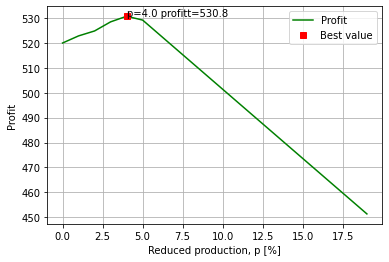

In [68]:
import matplotlib.pyplot as plt
# plt.plot(ps*100, production_times, 'b', label = 'Production times')
plt.plot(ps*100, profits, 'g', label = 'Profit')
plt.plot(ps[index]*100, profits[index], 'rs', label = 'Best value')
plt.text(ps[index]*100, profits[index], f"p={ps[index]*100:.1f} profitt={profits[index]:.1f}")
plt.grid()
plt.legend()
plt.xlabel('Reduced production, p [%]')
plt.ylabel('Profit')
plt.plot()

[]

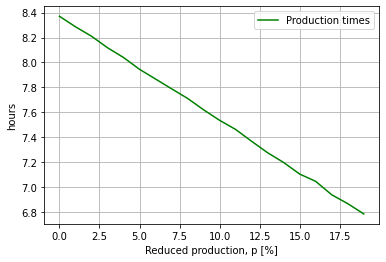

In [66]:
import matplotlib.pyplot as plt
# plt.plot(ps*100, production_times, 'b', label = 'Production times')
plt.plot(ps*100, production_times, 'g', label = 'Production times')
plt.grid()
plt.legend()
plt.xlabel('Reduced production, p [%]')
plt.ylabel('hours')
plt.plot()

[]

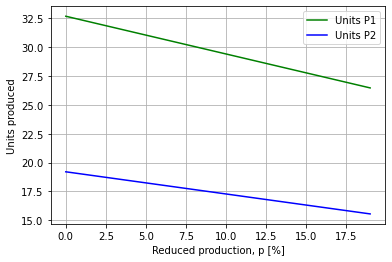

In [67]:
plt.plot(ps*100, num_units1, 'g', label = 'Units P1')
plt.plot(ps*100, num_units2, 'b', label = 'Units P2')
plt.grid()
plt.legend()
plt.xlabel('Reduced production, p [%]')
plt.ylabel('Units produced')
plt.plot()